In [34]:
from PIL import Image, ImageDraw
import matplotlib.patches as patches
import math
import os
import random
from pathlib import Path
import numpy as np
import yaml
import glob
import cv2
import torch
from pathlib import Path
import pandas as pd
import os
import shutil

def myFig(img, bbox_list, drawB = True) :
    image = Image.fromarray(img,"RGB")
    draw = ImageDraw.Draw(image)

    if drawB :
        xmin = bbox[0] 
        ymin = bbox[1]
        xmax = bbox[2]
        ymax = bbox[3]

        draw.rectangle((xmin, ymin, xmax, ymax), outline=(255,0,0), width = 1) # bounding box
#     display(image)
    return image

def make_json():
    coco_json_train = {}
    coco_json_train['licenses'] = [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/','id': 1,'name': 'Attribution-NonCommercial-ShareAlike License'}]
    coco_json_train['info'] = {'description': 'COCO apple Dataset','url': '','version': '','year': 2023,'contributor': 'COCO Consortium','date_created': '2023/04/11'}
    coco_json_train['annotations'] = []
    coco_json_train['categories'] = [{'supercategory': 'apple', 'id': 0, 'name': 'apple'}]
    coco_json_train['images'] = []


    coco_json_val = {}
    coco_json_val['licenses'] = [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/','id': 1,'name': 'Attribution-NonCommercial-ShareAlike License'}]
    coco_json_val['info'] = {'description': 'COCO apple Dataset','url': '','version': '','year': 2023,'contributor': 'COCO Consortium','date_created': '2023/04/11'}
    coco_json_val['annotations'] = []
    coco_json_val['categories'] = [{'supercategory': 'apple', 'id': 0, 'name': 'apple'}]
    coco_json_val['images'] = []
    
    return coco_json_train, coco_json_val


def make_dir(path):
    if not os.path.exists(path):
        print(path)
        make_dir(os.path.dirname(path))
        os.makedirs(path, exist_ok=True)

        
def myLoadImage(im_path,img_size, resize=True, augment=True) :
    im = cv2.imread(im_path)
    print(im.shape)
    h0, w0 = im.shape[:2]
    if resize : 
        r = img_size / max(h0, w0)
        if r != 1:  # if sizes are not equal
            interp = cv2.INTER_LINEAR if augment else cv2.INTER_AREA  # random.choice(self.rand_interp_methods)
            im = cv2.resize(im, (int(w0 * r), int(h0 * r)), interpolation=interp)
    return im, (h0, w0), im.shape[:2] 

def xywhn2xyxy(x, w=640, h=640, padw=0, padh=0):
    # Convert nx4 boxes from [x, y, w, h] normalized to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = w * (x[:, 0] - x[:, 2] / 2) + padw  # top left x
    y[:, 1] = h * (x[:, 1] - x[:, 3] / 2) + padh  # top left y
    y[:, 2] = w * (x[:, 0] + x[:, 2] / 2) + padw  # bottom right x
    y[:, 3] = h * (x[:, 1] + x[:, 3] / 2) + padh  # bottom right y
    return y

def convert_coordinates(x1, y1, x2, y2, img_width, img_height, cate):
    # 바운딩 박스의 중심 좌표와 너비, 높이 계산
    box_width = x2 - x1
    box_height = y2 - y1
    x_center = (x1 + x2) / 2.0
    y_center = (y1 + y2) / 2.0
    
    # 이미지의 너비와 높이로 나누어서 정규화된 값 계산
    x_center /= img_width
    y_center /= img_height
    box_width /= img_width
    box_height /= img_height
    
    # 결과를 문자열로 반환
    return f"{cate} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}"

(256, 256)
[[ 50.  50.]
 [150.  50.]
 [ 50. 100.]] [[ 50.  70.]
 [150.  60.]
 [200. 120.]]
(256, 256)


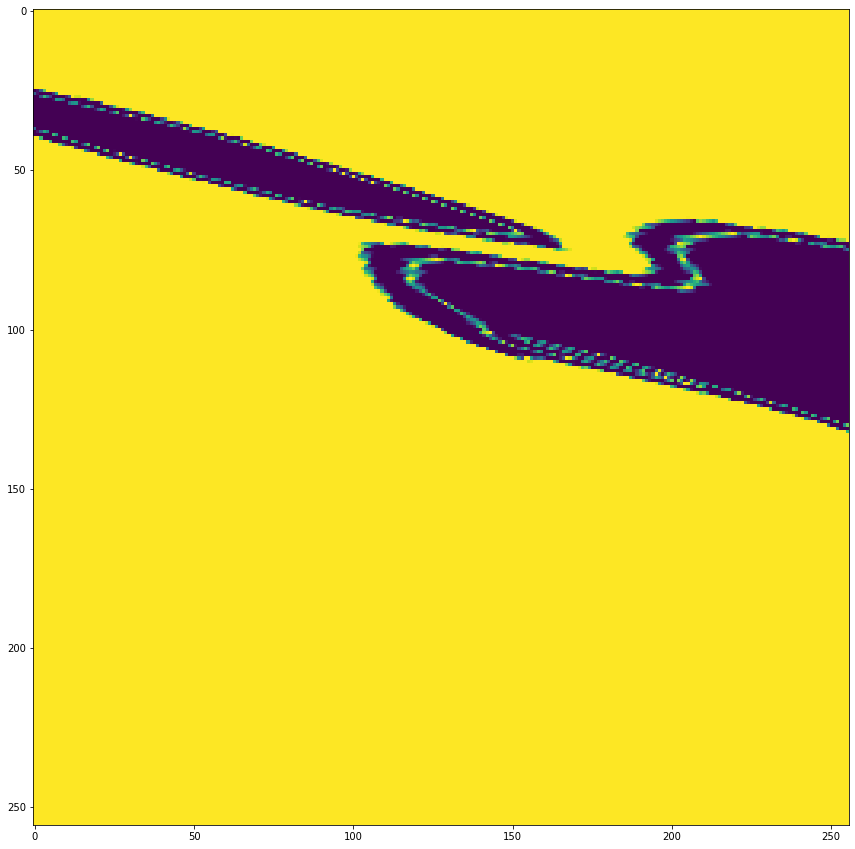

In [107]:
from imantics import Polygons, Mask
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import pickle
import os
import random

pickle_path = '/data/ij/edge/LDC/edge_interface_synthesis/pickle/big_apple.png.pickle'
back_img = cv2.imread("/data/ij/coco_img/train/000000000001.jpg")

s_lm = int(min(back_img.shape[0],back_img.shape[1])-100)
resize_size = random.randrange(30,255)



with open(f'{pickle_path}', 'rb') as f:
    data = pickle.load(f)

mask = data['mask']
t_s = mask.shape[0]
pts1 = np.float32([[50, 50], [150, 50], [50, 100]])
pts2 = np.float32([[50, 70], [150, 60], [200, 120]])
print(mask.shape)
print(pts1,pts2)


df = cv2.getAffineTransform(pts1, pts2)
mask12 = cv2.warpAffine(mask, df, (t_s,t_s),borderValue = 255)


print(mask12.shape)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(mask12)
plt.show()

(256, 256)
[[  0.   0.]
 [  0. 256.]
 [256.   0.]
 [256. 256.]] [[100.  50.]
 [ 10. 206.]
 [156.  50.]
 [246. 206.]]
(256, 256)


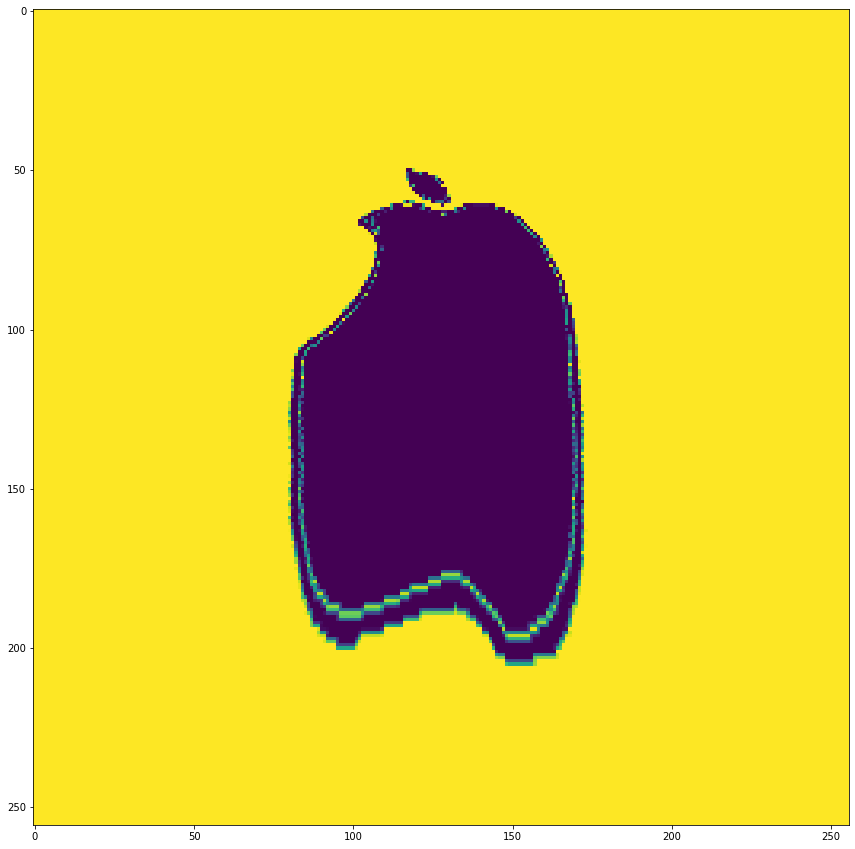

In [96]:
from imantics import Polygons, Mask
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import pickle
import os
import random

pickle_path = '/data/ij/edge/LDC/edge_interface_synthesis/pickle/big_apple.png.pickle'
back_img = cv2.imread("/data/ij/coco_img/train/000000000001.jpg")

s_lm = int(min(back_img.shape[0],back_img.shape[1])-100)
resize_size = random.randrange(30,255)



with open(f'{pickle_path}', 'rb') as f:
    data = pickle.load(f)

mask = data['mask']
t_s = mask.shape[0]
# pts1 = np.float32([[random.randrange(100,256),random.randrange(100,256)] for i in range(3)])
# pts2 = np.float32([[random.randrange(100,256),random.randrange(100,256)] for i in range(3)])

pts1 = np.float32([[0,0], [0,t_s], [t_s, 0], [t_s,t_s]])
pts2 = np.float32([[100,50], [10,t_s-50], [t_s-100, 50], [t_s-10,t_s-50]])


print(mask.shape)
print(pts1,pts2)


# df = cv2.getAffineTransform(pts1, pts2)
# mask12 = cv2.warpAffine(mask, mtrx, (t_s,t_s),borderValue = 255)

mtrx = cv2.getPerspectiveTransform(pts1, pts2)
mask12 = cv2.warpPerspective(mask, mtrx, (t_s, t_s),borderValue = 255)

print(mask12.shape)


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(mask12)
plt.show()

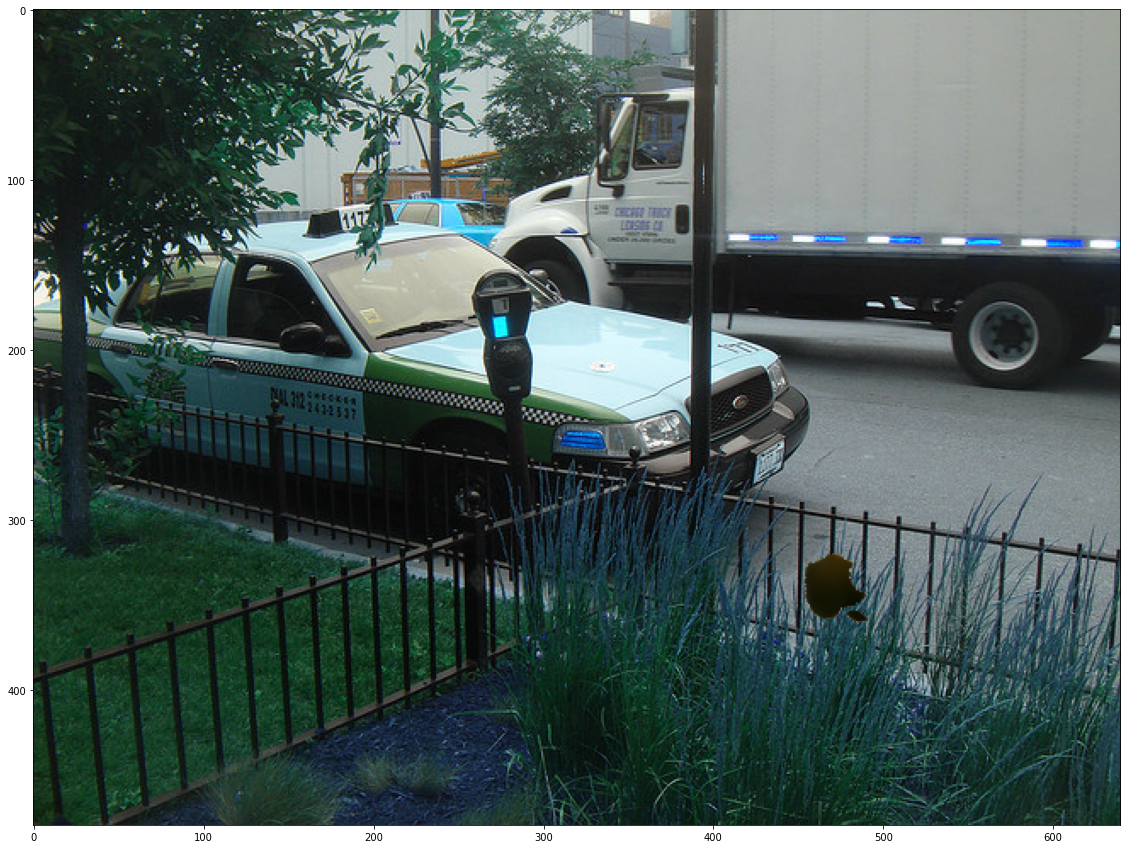

In [45]:
from imantics import Polygons, Mask
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import pickle
import os
import random

pickle_path = '/data/ij/edge/LDC/edge_interface_synthesis/pickle/big_apple.png.pickle'
back_img = cv2.imread("/data/ij/coco_img/train/000000000001.jpg")

s_lm = int(min(back_img.shape[0],back_img.shape[1])-100)
resize_size = random.randrange(30,255)



with open(f'{pickle_path}', 'rb') as f:
    data = pickle.load(f)

mask = data['mask']
mask = cv2.resize(mask, (resize_size, resize_size), interpolation=cv2.INTER_LANCZOS4)

target_img_name = pickle_file.split('.')[0]

target_img_path = f'/data/ij/edge/LDC/edge_interface_synthesis/big_apple.jpg'
target_img = cv2.imread(target_img_path)
target_img = cv2.resize(target_img, (resize_size, resize_size), interpolation=cv2.INTER_LANCZOS4)

t_s = target_img.shape[0]

r_degree = random.randrange(0,360)
b = cv2.getRotationMatrix2D((t_s/2,t_s/2), r_degree,1)
mask = cv2.warpAffine(mask, b,(t_s,t_s),borderValue = 255)
target_img = cv2.warpAffine(target_img, b,(t_s,t_s),borderValue = 255)
mask[mask >= 50] = 255
mask[mask < 50] = 0



mask_inv = cv2.bitwise_not(mask)

# f = plt.figure()
# f.set_figwidth(20)
# f.set_figheight(15)
# plt.imshow(mask_inv)
# plt.show()
        

height1, width1 = target_img.shape[:2]
height2, width2 = back_img.shape[:2]

x_limit = int(back_img.shape[1])-resize_size
y_limit = int(back_img.shape[0])-resize_size
x1 = random.randrange(0,x_limit)
y1 = random.randrange(0,y_limit)
x2 = x1 + width1
y2 = y1 + height1

roi = back_img[y1:y2, x1:x2]
fg = cv2.bitwise_and(target_img, target_img, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
back_img[y1:y2, x1:x2] = fg + bg
bbox = [x1 ,y1, x2, y2]

        
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(back_img)
plt.show()


        
        



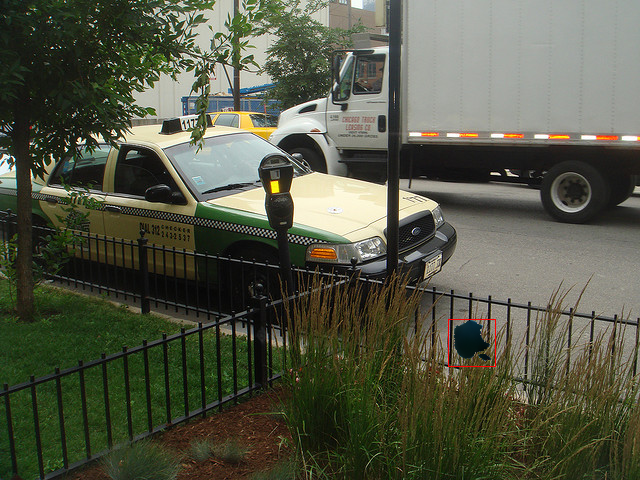

In [46]:
myFig(cv2.cvtColor(back_img, cv2.COLOR_BGR2RGB), bbox)